In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
mushroomDF = pd.read_csv('/content/mushroom edibility classification dataset.csv')

In [ ]:
mushroomDF.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
mushroomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   object 
 2   cap-shape                 3116 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3116 non-null   float64
 5   bruises                   3124 non-null   object 
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  veil-col

In [ ]:
mushroomDF['bruises'].unique()

array(['bruises is there', 'no bruises'], dtype=object)

In [ ]:
mushroomDF['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
mushroomDF['bruises'] = enc.fit_transform(mushroomDF['bruises'])

In [ ]:
mushroomDF['class'] = mushroomDF['class'].map({'poisonous':0,'edible':1}) 

In [ ]:
mushroomDF.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
mushroom = mushroomDF[mushroomDF['cap-shape'].notnull()]

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='median')

impute.fit(mushroom[['cap-color']])

mushroom['cap-color'] = impute.transform(mushroom[['cap-color']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
mushroom.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
mushcorr = mushroom.corr()

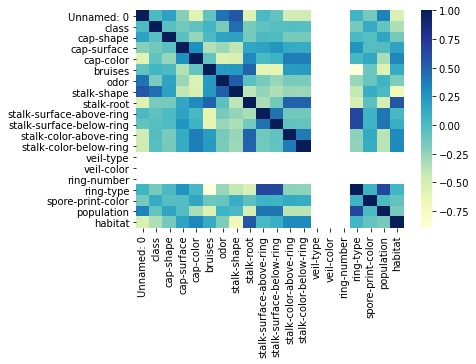

In [ ]:
sns.heatmap(mushcorr, cmap='YlGnBu')

In [ ]:
mushroom = mushroom.drop(['veil-color','veil-type','ring-number','Unnamed: 0'],axis=1)

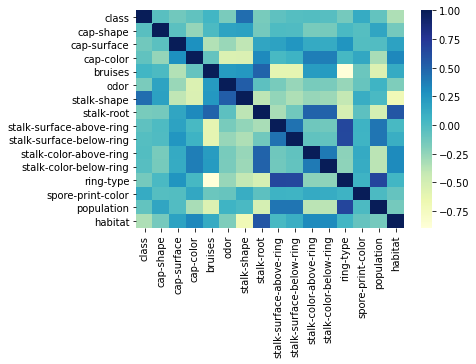

In [ ]:
mushcorr = mushroom.corr()
sns.heatmap(mushcorr, cmap='YlGnBu')

In [ ]:
from sklearn.model_selection import train_test_split
X = mushroom.drop(['class'],axis=1)
Y = mushroom['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,
                                                    random_state=1)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
score={
    'noPCA':{
        'svc':svc.score(x_test,y_test),
        'rfc':rfc.score(x_test,y_test),
        'nnc':nnc.score(x_test,y_test)
    },
    'PCA':{
        'svc':0,
        'rfc':0,
        'nnc':0
    }
}
print('Score without PCA \nSVM: {}\nRandom Forest: {}\nMLPClassifier: {}'.format(score['noPCA']['svc'], score['noPCA']['rfc'], score['noPCA']['nnc']))

Score without PCA 
SVM: 0.9951923076923077
Random Forest: 1.0
MLPClassifier: 0.9983974358974359


In [ ]:
# PCA

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,0.806691,0.341598,-0.438894,-0.657757,1.047912,-1.325716,0.927028,0.39448,0.274662,0.475272,0.477693,0.588927,-0.788497,-0.195710,2.596797
1,0.806691,0.341598,1.566963,-0.657757,-2.269352,-1.325716,-0.064943,0.39448,0.274662,0.475272,0.477693,0.588927,0.680096,-0.852855,-0.105589
2,-2.061461,0.341598,1.165791,-0.657757,-0.610720,-1.325716,-0.064943,0.39448,0.274662,0.475272,0.477693,0.588927,0.680096,-0.852855,1.245604
3,0.806691,1.105171,1.165791,-0.657757,1.047912,-1.325716,0.927028,0.39448,0.274662,0.475272,0.477693,0.588927,-0.788497,-0.195710,2.596797
4,0.806691,0.341598,-0.840065,1.520319,0.495034,0.754310,0.927028,0.39448,0.274662,0.475272,0.477693,-1.732510,0.680096,-2.167147,-0.105589


In [ ]:
len(X.columns)

15

In [ ]:
from sklearn.decomposition import PCA 
n_components=len(X.columns)//2
pca = PCA(n_components=n_components)
principal_components= pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.8192682181452461

In [ ]:
columns=['pc_col '+str(i) for i in range(n_components)]
principal_df = pd.DataFrame(data=principal_components, columns=columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principal_df, Y,test_size=0.2,random_state=1)
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
score['PCA']['svc']=svc.score(x_test,y_test)
score['PCA']['rfc']=rfc.score(x_test,y_test)
score['PCA']['nnc']=nnc.score(x_test,y_test)
print('Score with PCA \nSVM: {}\nRandom Forest: {}\nMLPClassifier: {}'.format(score['PCA']['svc'], score['PCA']['rfc'], score['PCA']['nnc']))

Score with PCA 
SVM: 0.8990384615384616
Random Forest: 0.9983974358974359
MLPClassifier: 1.0


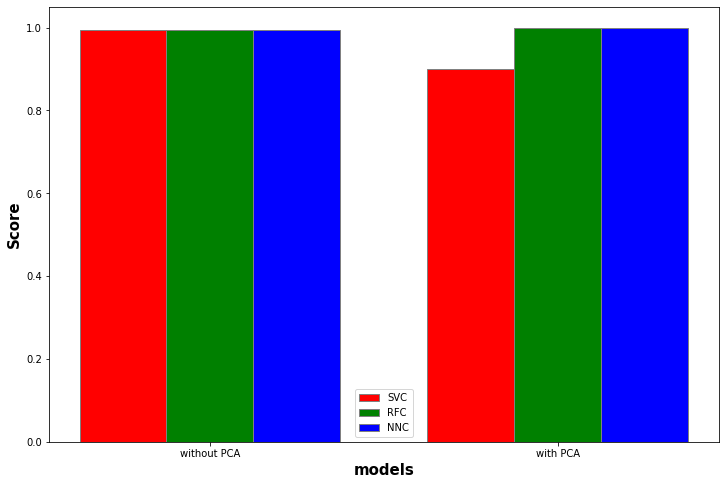

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
SVC = [score['noPCA']['svc'], score['PCA']['svc']]
RFC = [score['noPCA']['svc'], score['PCA']['rfc']]
NNC = [score['noPCA']['svc'], score['PCA']['nnc']]

# Set position of bar on X axis
br1 = np.arange(len(SVC))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, SVC, color ='r', width = barWidth,
    edgecolor ='grey', label ='SVC')
plt.bar(br2, RFC, color ='g', width = barWidth,
    edgecolor ='grey', label ='RFC')
plt.bar(br3, NNC, color ='b', width = barWidth,
    edgecolor ='grey', label ='NNC')

# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(SVC))],
    ['without PCA', 'with PCA'])

plt.legend()
plt.show()


# END of Assignment 6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test set accuracy Without Scaler : {:.2f}".format(knn.score(X_test, y_test)))

knn=KNeighborsClassifier()
knn.fit(X_train_mmScaled, y_train)
print("Test set accuracy MinMaxScaler : {:.2f}".format(knn.score(X_test_mmScaled, y_test)))

knn=KNeighborsClassifier()
knn.fit(X_train_sScaled, y_train)
print("Test set accuracy Standard Scaler : {:.2f}".format(knn.score(X_test_sScaled, y_test)))

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Loading dataset
mushroomDF = pd.read_csv('/content/mushroom edibility classification dataset.csv')
mushroomDF.head()

#checking dataframe information
mushroomDF.info()

# checking unique values in categorical feature
mushroomDF['bruises'].unique()
mushroomDF['class'].unique()

#Encoding categorical features
enc = LabelEncoder()
mushroomDF['bruises'] = enc.fit_transform(mushroomDF['bruises'])
mushroomDF['class'] = mushroomDF['class'].map({'poisonous':0,'edible':1})

#Handling missing values
mushroomDF.isnull().sum()
mushroom = mushroomDF[mushroomDF['cap-shape'].notnull()]
impute = SimpleImputer(missing_values=np.nan, strategy='median')
impute.fit(mushroom[['cap-color']])
mushroom['cap-color'] = impute.transform(mushroom[['cap-color']])
mushroom.isnull().sum()

#checking features correlation
mushcorr = mushroom.corr()
sns.heatmap(mushcorr, cmap='YlGnBu')
mushroom = mushroom.drop(['veil-color','veil-type','ring-number','Unnamed: 0'],axis=1)
mushcorr = mushroom.corr()
sns.heatmap(mushcorr, cmap='YlGnBu')

X = mushroom.drop(['class'],axis=1)
Y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)


# Scaling data with different scaler
minMaxscaler = MinMaxScaler()
Standardscaler = StandardScaler()
minMaxscaler.fit(X_train)
Standardscaler.fit(X_train)
X_train_mmScaled = minMaxscaler.transform(X_train)
X_train_sScaled = Standardscaler.transform(X_train)
X_test_mmScaled = minMaxscaler.transform(X_test)
X_test_sScaled = Standardscaler.transform(X_test)


# Testing using KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test set accuracy Without Scaler : {:.2f}".format(knn.score(X_test, y_test)))

knn=KNeighborsClassifier()
knn.fit(X_train_mmScaled, y_train)
print("Test set accuracy MinMaxScaler : {:.2f}".format(knn.score(X_test_mmScaled, y_test)))
knn=KNeighborsClassifier()
knn.fit(X_train_sScaled, y_train)
print("Test set accuracy Standard Scaler : {:.2f}".format(knn.score(X_test_sScaled, y_test)))

